En este documento realizamos un análisis detallado de los ingresos presupuestarios percibidos en Brasil entre 2013 y 2021. Analizaremos los ingresos por categoría económica, por órgano administrativo y temporalmente.

`Importante`

Dentro del análisis tendremos que tener en cuenta que el valor registrado (valor lancado) y el valor recaudado (valor realizado) deberían ser iguales, ya que lo que se registra contablemente debe ser igual a lo que se recibe finalmente contablemente. En caso de que se produzcan diferencias entre ambos valores para cada entrada, será necesario observar las razones por las cuales se produce esta casuística. 

Indicamos a continuación el significado de las columnas que contienen valores de ingresos:

- Previsión del ingreso (valor previsto atualizado): previsión del ingreso a recaudar
- Ingreso registrado (valor lancado): valor del ingreso registrado "contablemente".
- Ingreso recaudado (valor realizado): valor del ingreso recaudado finalmente. 
- Importe recaudado sobre la previsión (percentual realizado): porcentaje de la previsión recaudado finalmente. 

In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import seaborn as sns
import matplotlib.pyplot as plt
from src import funciones_soporte as fs

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
datos_brasil = pd.read_pickle("datos/datos_brasil.pkl")
print(datos_brasil.shape)
datos_brasil.head(1)

(1026299, 16)


,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CATEGORIA ECONÔMICA,ORIGEM RECEITA,ESPÉCIE RECEITA,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,PERCENTUAL REALIZADO,DATA LANÇAMENTO,ANO EXERCÍCIO
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,0.00,0.00,"1,297.13",0.00,2013-12-31,2013


## *Evolución temporal*

En este apartado nos encontraremos con un análisis temporal de los ingresos. Revisaremos las diferencias entre los valores previstos y los recaudados finalmente, así como entre los ingresos registrados y los recaudados realmente. 

### *Previsiones y recaudacion*

In [4]:
# Filtramos el dataframe para quedarnos solo con las columnas de fecha de registro del ingreso y los valores de ingresos.
df_comp_recaudacion_prevision = datos_brasil.iloc[: ,[10, 12, 14]]
df_comp_recaudacion_prevision["Año"] = df_comp_recaudacion_prevision["DATA LANÇAMENTO"].dt.strftime("%Y")
df_comp_recaudacion_prevision

C:\Users\gabri\AppData\Local\Temp\ipykernel_10276\2635946192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_recaudacion_prevision["Año"] = df_comp_recaudacion_prevision["DATA LANÇAMENTO"].dt.strftime("%Y")


,VALOR PREVISTO ATUALIZADO,VALOR REALIZADO,DATA LANÇAMENTO,Año
0,0.00,"1,297.13",2013-12-31,2013
1,0.00,"26,666,621.42",2013-12-31,2013
2,0.00,"301,251.13",2013-12-31,2013
3,0.00,"1,855.58",2013-12-31,2013
4,0.00,"52,140.68",2013-12-31,2013
...,...,...,...,...
1026294,"16,940,891.00",0.00,2021-04-23,2021
1026295,0.00,372.90,2021-11-22,2021
1026296,"200,000.00",0.00,2021-04-23,2021
1026297,0.00,"1,000,000.00",2021-05-10,2021


In [5]:
df_agrupado = df_comp_recaudacion_prevision.groupby("Año")[["VALOR PREVISTO ATUALIZADO","VALOR REALIZADO"]].sum()
df_agrupado["porcentaje_recaudacion"] = round((df_agrupado["VALOR REALIZADO"]/df_agrupado["VALOR PREVISTO ATUALIZADO"]) *100, 2)
df_agrupado

,VALOR PREVISTO ATUALIZADO,VALOR REALIZADO,porcentaje_recaudacion
Año,,,
2013,"2,174,650,946,322.04","1,893,613,719,099.78",87.08
2014,"2,392,129,226,119.23","2,238,551,079,327.88",93.58
2015,"2,878,827,555,613.92","2,665,685,375,159.13",92.60
2016,"2,952,696,248,075.54","2,839,711,583,462.82",96.17
2017,"3,414,379,614,681.84","2,558,047,412,866.96",74.92
2018,"3,505,648,331,810.28","2,942,387,872,873.97",83.93
2019,"3,261,378,698,948.11","2,991,564,738,258.26",91.73
2020,"3,577,146,718,910.25","3,631,448,629,524.17",101.52
2021,"4,180,716,471,387.52","3,876,372,024,873.04",92.72


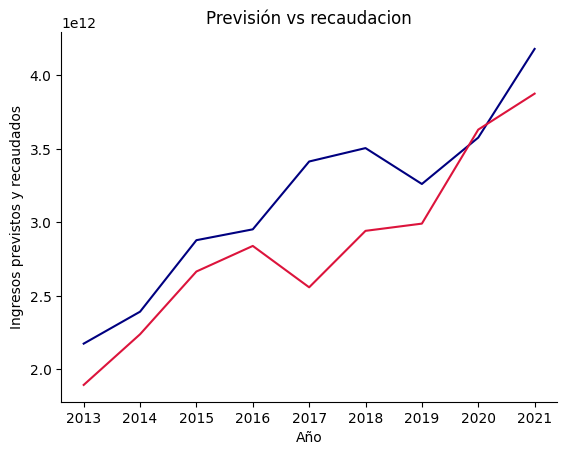

In [6]:
fs.evolucion_temporal(df_agrupado, "Año", ["VALOR PREVISTO ATUALIZADO", "VALOR REALIZADO"])

Como podemos ver en ambos gráficos tanto la previsión, como la recaudación real de los ingresos públicos de Brasil presentan una tendencia al alza a lo largo de los años. Aún así observamos que la recaudación anual presenta valores inferiores en todos los años a la previsión recaudada. Principalmente vemos una importante reducción en la recaudación anual en 2017, año en el cual se esperaba ingresar un total de 3.414.379.614.681,84 $, de los cuales se ingresaron solo un 74,92 %. Esto puede deberse a la crisis económica que sufrió el país entre 2015 y 2016. 

### *Ingresos registrados e ingresos recaudados*

In [7]:
# Filtramos el dataframe para quedarnos solo con las columnas de fecha de registro del ingreso y los valores de ingresos.
df_comp_recaudacion_registro = datos_brasil.iloc[: ,[11, 12, 14]]
df_comp_recaudacion_registro["Año"] = df_comp_recaudacion_registro["DATA LANÇAMENTO"].dt.strftime("%Y")
df_comp_recaudacion_registro

C:\Users\gabri\AppData\Local\Temp\ipykernel_3212\2262978967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_recaudacion_registro["Año"] = df_comp_recaudacion_registro["DATA LANÇAMENTO"].dt.strftime("%Y")


,VALOR LANÇADO,VALOR REALIZADO,DATA LANÇAMENTO,Año
0,0.00,"1,297.13",2013-12-31,2013
1,0.00,"26,666,621.42",2013-12-31,2013
2,0.00,"301,251.13",2013-12-31,2013
3,0.00,"1,855.58",2013-12-31,2013
4,0.00,"52,140.68",2013-12-31,2013
...,...,...,...,...
1026294,0.00,0.00,2021-04-23,2021
1026295,0.00,372.90,2021-11-22,2021
1026296,0.00,0.00,2021-04-23,2021
1026297,0.00,"1,000,000.00",2021-05-10,2021


In [8]:
df_agrupado2 = df_comp_recaudacion_registro.groupby("Año")[["VALOR LANÇADO","VALOR REALIZADO"]].sum()
df_agrupado2["diferencia recaudacion"] = df_agrupado2["VALOR LANÇADO"] - df_agrupado2["VALOR REALIZADO"]
df_agrupado2

,VALOR LANÇADO,VALOR REALIZADO,diferencia recaudacion
Año,,,
2013,"1,142,556,841,623.94","1,893,613,719,099.78","-751,056,877,475.84"
2014,"1,266,561,021,071.51","2,238,551,079,327.88","-971,990,058,256.37"
2015,"307,296,621,471.69","2,665,685,375,159.13","-2,358,388,753,687.44"
2016,"18,651,606,918.55","2,839,711,583,462.82","-2,821,059,976,544.27"
2017,"133,949,259,691.54","2,558,047,412,866.96","-2,424,098,153,175.42"
2018,"8,523,696,496.37","2,942,387,872,873.97","-2,933,864,176,377.60"
2019,"-124,684,806,683.59","2,991,564,738,258.26","-3,116,249,544,941.85"
2020,"35,589,145,007.15","3,631,448,629,524.17","-3,595,859,484,517.02"
2021,"-6,336,662,253.18","3,876,372,024,873.04","-3,882,708,687,126.22"


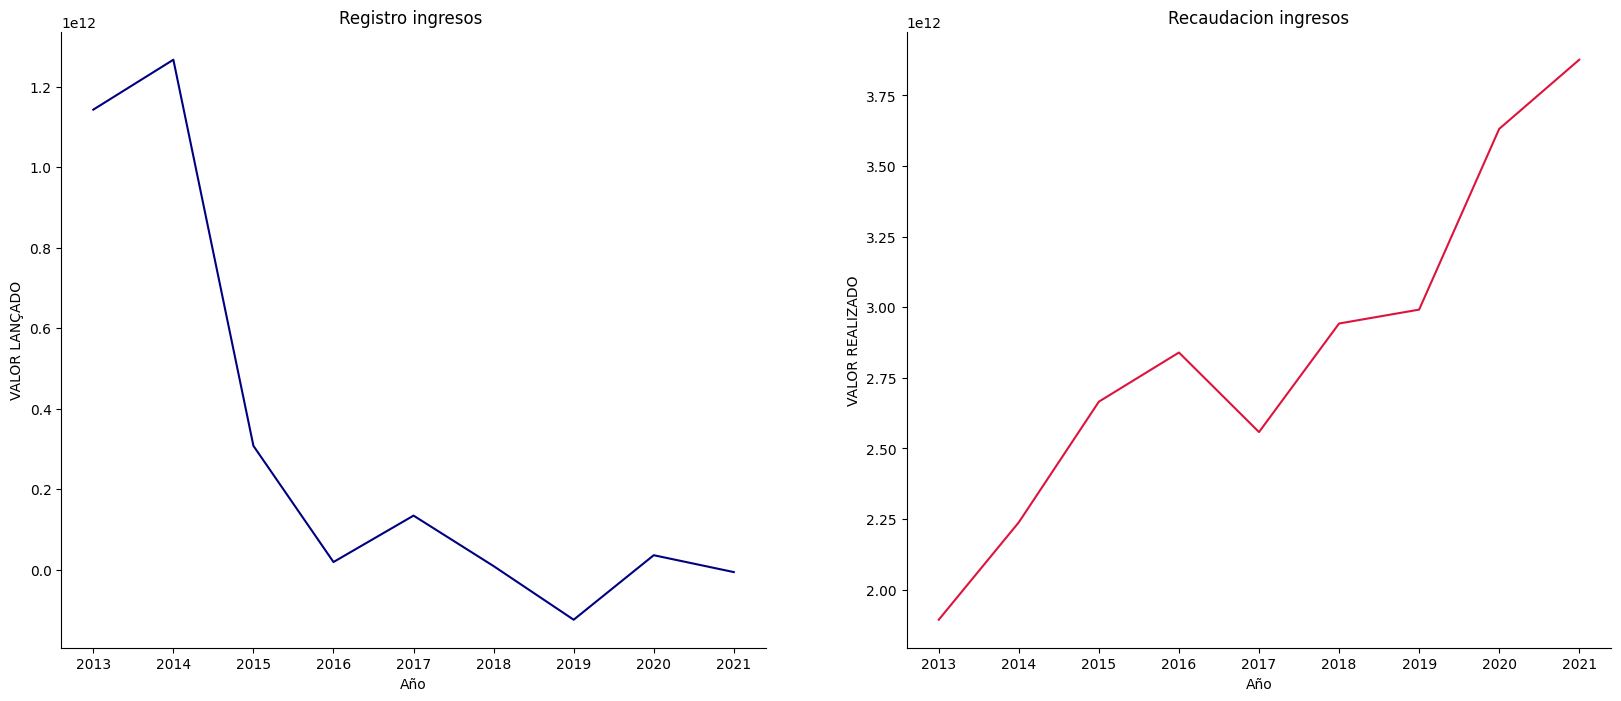

In [9]:
fs.evolucion_temporal(df_agrupado2, "Año", ["VALOR LANÇADO", "VALOR REALIZADO"])

En cuanto a los registros de ingresos, y la recaudación real observamos enormes diferencias. Como hemos comentado anteriormente, el registro de un ingreso contable debe ser igual al ingreso final recibido por la entidad recaudadora. En este caso no se cumple este principio. Vemos que durante todo el período analizado el resgitro de ingresos presenta una tendencia a la baja, mientras que los ingresos realmente recaudados presentan una tendencia al alza. Se están registrando menos ingresos de los que se están recuadando realmente. Más abajo observaremos qué entidades administrativas presentan mayores diferencias en este aspecto, ya que intuimos la existencia de fraude públiico.

## *Ingresos por categoría económica*

Como hemos visto anteriormente los ingresos de Brasil entre 2013 y 2021 se clasifican en diferentes categorías y subcategorías económicas. A continuación realizaremos un análisis de los ingresos recibidos por categoría y después de las subcategorías que contienen las categorías principales. 

Las categorías económicas principales en las que se dividen los ingresos de Brasil son:
- Ingresos corrientes
- Ingresos de capital
- Ingresos corrientes - intrapresupuestarios	
- Ingresos de capital - intrapresupuestarios

In [10]:
ingresos_cat = datos_brasil.groupby(["CATEGORIA ECONÔMICA", "ORIGEM RECEITA"])[["VALOR PREVISTO ATUALIZADO", "VALOR LANÇADO","VALOR REALIZADO"]].sum().round(2)
ingresos_cat

VALOR PREVISTO ATUALIZADO  \
CATEGORIA ECONÔMICA                       ORIGEM RECEITA                                                           
Receitas Correntes                        Contribuições                                     7,224,633,087,504.00   
                                          Impostos, Taxas e Contribuições de Melhoria       4,510,202,085,939.00   
                                          Outras Receitas Correntes                           428,858,259,677.00   
                                          Receita Agropecuária                                    230,056,327.00   
                                          Receita Industrial                                   18,734,738,626.00   
                                          Receita Patrimonial                                 922,303,174,656.03   
                                          Receita de Serviços                                 439,803,742,964.11   
                                          Receitas Correntes - a classificar                                0.00   
                                          Transferências Correntes                              4,761,797,513.00   
Receitas Correntes - intra-orçamentárias  Contribuições                                       190,615,572,904.00   
                                          Impostos, Taxas e Contribuições de Melhoria               8,679,239.00   
                                          Outras Receitas Correntes                            98,478,861,468.00   
                                          Receita Industrial                                    1,381,739,049.00   
                                          Receita Patrimonial                                      45,380,166.00   
                                          Receita de Serviços                                     954,793,093.00   
Receitas de Capital                       Alienação de Bens                                    69,459,904,322.00   
                                          Amortizações de Empréstimos                         468,392,937,016.00   
                                          Operações de Crédito                             12,776,862,878,819.19   
                                          Outras Receitas de Capital                        1,169,948,076,486.00   
                                          Transferências de Capital                             1,089,634,563.40   
Receitas de Capital - intra-orçamentárias Alienação de Bens                                                 0.00   
                                          Operações de Crédito                                 10,808,411,537.00   
Sem informação                            Sem informação                                                    0.00   

                                                                                             VALOR LANÇADO  \
CATEGORIA ECONÔMICA                       ORIGEM RECEITA                                                     
Receitas Correntes                        Contribuições                               3,220,620,507,720.18   
                                          Impostos, Taxas e Contribuições de Melhoria 2,020,808,903,486.62   
                                          Outras Receitas Correntes                     136,055,962,948.35   
                                          Receita Agropecuária                                        0.00   
                                          Receita Industrial                                          0.00   
                                          Receita Patrimonial                               380,086,767.00   
                                          Receita de Serviços                                         0.00   
                                          Receitas Correntes - a classificar                  5,042,321.57   
                                          Transferências Correntes                    

In [11]:
def info_cat_ec(dataframe, categoria):

    ingresos_categoria = dataframe.groupby(categoria)[["VALOR PREVISTO ATUALIZADO", "VALOR LANÇADO","VALOR REALIZADO"]].sum().round(2)
    ingresos_categoria["porcentaje recaudado"] = round((ingresos_categoria["VALOR REALIZADO"]/ingresos_categoria["VALOR PREVISTO ATUALIZADO"])* 100, 2).replace([np.inf, -np.inf, np.nan], "Previsión de 0")
    ingresos_categoria["diferencia_recaudacion"] = round(ingresos_categoria["VALOR REALIZADO"]-ingresos_categoria["VALOR LANÇADO"], 2)

    return ingresos_categoria

Vamos a ir viendo el desglose de los ingresos por categoría ecoómica.

In [12]:
# Ingresos por categoría económica general
categorias_economicas = info_cat_ec(datos_brasil, "CATEGORIA ECONÔMICA").reset_index()
categorias_economicas

,CATEGORIA ECONÔMICA,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
0,Receitas Correntes,"13,549,526,943,206.14","5,377,870,503,243.72","12,909,343,128,909.43",95.28,"7,531,472,625,665.71"
1,Receitas Correntes - intra-orçamentárias,"291,485,025,919.00",0.00,"292,651,790,699.89",100.40,"292,651,790,699.89"
2,Receitas de Capital,"14,485,753,431,206.59","3,813,949.42","12,407,136,680,065.79",85.65,"12,407,132,866,116.37"
3,Receitas de Capital - intra-orçamentárias,"10,808,411,537.00",0.00,"28,250,835,724.33",261.38,"28,250,835,724.33"
4,Sem informação,0.00,"2,812,347,576.39",46.57,Previsión de 0,"-2,812,347,529.82"


C:\Users\gabri\AppData\Local\Temp\ipykernel_3212\3643957032.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


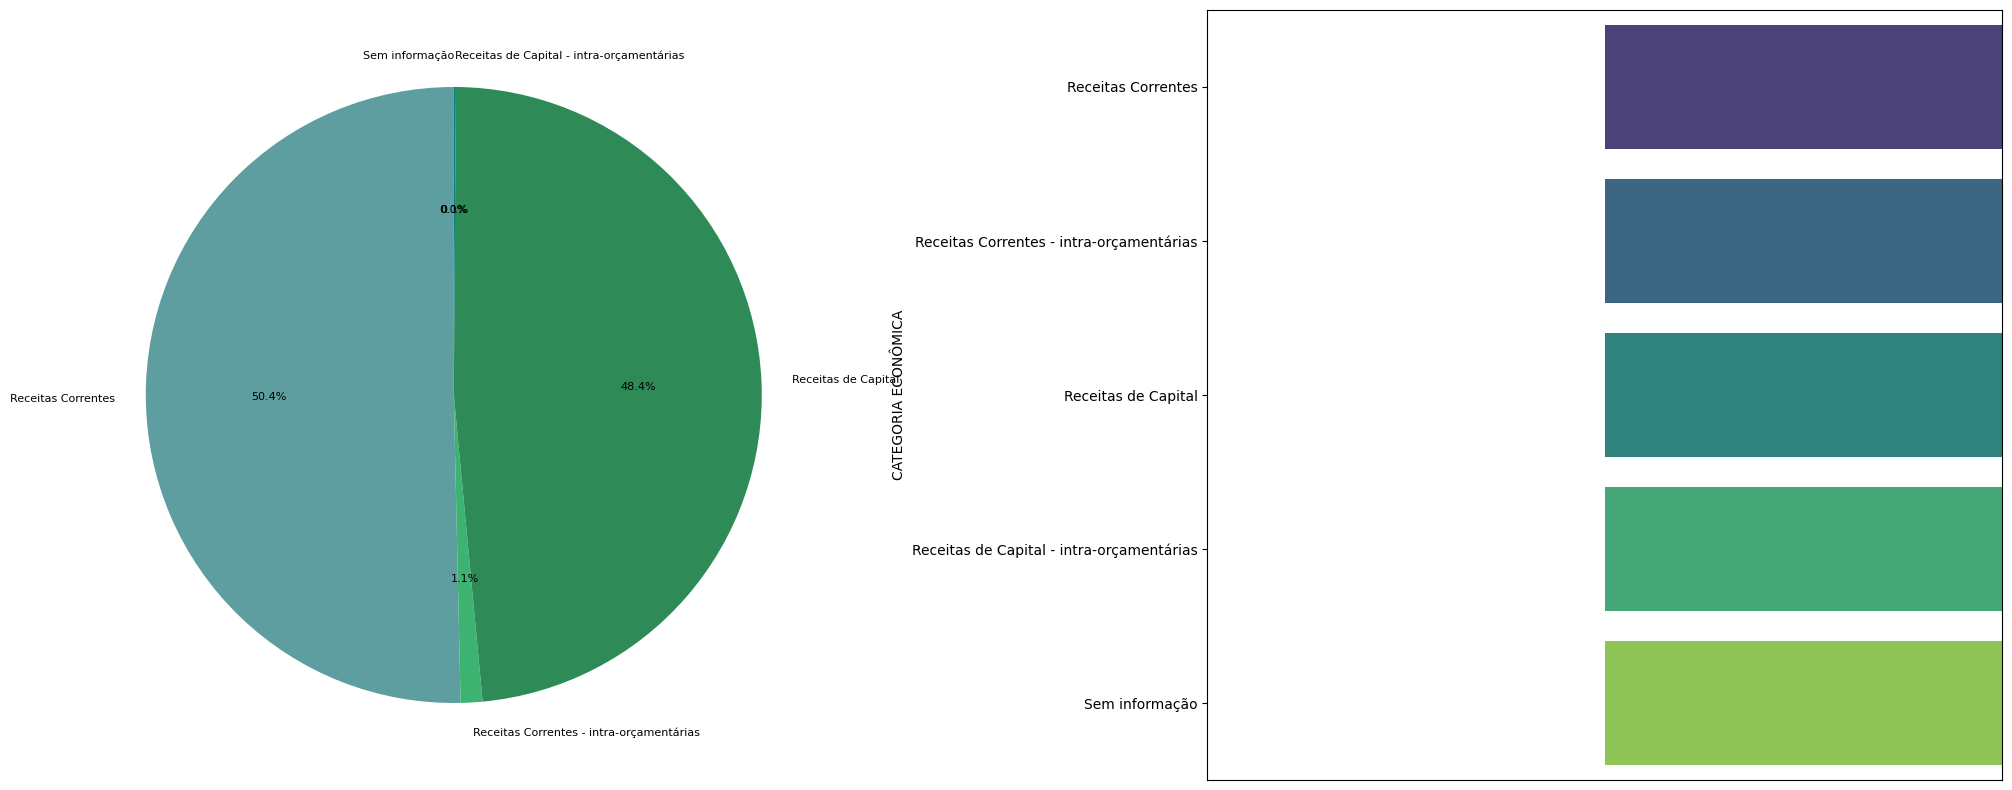

In [29]:
colores_categorias = ["cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise"]

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 8), sharex = True)

axes[0].pie("VALOR REALIZADO", 
        labels = "CATEGORIA ECONÔMICA",
        data = categorias_economicas, 
        autopct=  '%1.1f%%', 
        colors = colores_categorias, 
        textprops={'fontsize': 8}, 
        startangle=90,
        )
sns.barplot(
    x="VALOR REALIZADO",
    y="CATEGORIA ECONÔMICA",
    data = categorias_economicas,
    palette="viridis")

plt.tight_layout()

### *Ingresos corrientes*

In [14]:
# Ingresos corrientes
ingresos_corrientes = datos_brasil[datos_brasil["CATEGORIA ECONÔMICA"] == "Receitas Correntes"]
info_cat_ec(ingresos_corrientes, "ORIGEM RECEITA")

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
ORIGEM RECEITA,,,,,
Contribuições,"7,224,633,087,504.00","3,220,620,507,720.18","6,877,089,890,534.66",95.19,"3,656,469,382,814.48"
"Impostos, Taxas e Contribuições de Melhoria","4,510,202,085,939.00","2,020,808,903,486.62","4,287,304,858,124.57",95.06,"2,266,495,954,637.95"
Outras Receitas Correntes,"428,858,259,677.00","136,055,962,948.35","371,983,192,854.63",86.74,"235,927,229,906.28"
Receita Agropecuária,"230,056,327.00",0.00,"212,916,430.85",92.55,"212,916,430.85"
Receita Industrial,"18,734,738,626.00",0.00,"17,941,345,587.65",95.77,"17,941,345,587.65"
Receita Patrimonial,"922,303,174,656.03","380,086,767.00","957,242,133,633.19",103.79,"956,862,046,866.19"
Receita de Serviços,"439,803,742,964.11",0.00,"409,260,662,661.21",93.06,"409,260,662,661.21"
Receitas Correntes - a classificar,0.00,"5,042,321.57","-15,471,989,712.32",Previsión de 0,"-15,477,032,033.89"
Transferências Correntes,"4,761,797,513.00",0.00,"3,780,118,794.99",79.38,"3,780,118,794.99"


In [15]:
# Nos metemos en las contribuciones
ingresos_corrientes = datos_brasil[datos_brasil["ORIGEM RECEITA"] == "Contribuições"]
info_cat_ec(ingresos_corrientes, "ESPÉCIE RECEITA")

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
ESPÉCIE RECEITA,,,,,
Contribuições econômicas,"128,465,554,111.00","31,469,943,756.64","137,391,936,282.17",106.95,"105,921,992,525.53"
Contribuições para Entidades Privadas de Serv,0.00,"7,236,634,754.58",0.00,Previsión de 0,"-7,236,634,754.58"
Contribuições sociais,"7,286,783,106,297.00","3,181,913,929,208.96","6,906,212,225,604.08",94.78,"3,724,298,296,395.12"


In [16]:
# dentro de las contibuciones nos metemos en las contribuciones económicas
ingresos_corrientes = datos_brasil[datos_brasil["ESPÉCIE RECEITA"] == "Contribuições econômicas"]
ingresos_corrientes_detalle = info_cat_ec(ingresos_corrientes, "DETALHAMENTO").reset_index()
ingresos_corrientes_detalle[ingresos_corrientes_detalle["VALOR LANÇADO"] == 0]

,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
1,CIDE-COMBUST.-COMERCIALIZACAO-DIV.AT-MUL.JUR.,"513,811,274.00",0.00,"2,329,775.85",0.45,"2,329,775.85"
2,CIDE-COMBUST.-COMERCIALIZACAO-JUROS DIV.ATIVA,"1,413,413.00",0.00,"2,628,207.83",185.95,"2,628,207.83"
3,CIDE-COMBUST.-COMERCIALIZACAO-JUROS DÍV.ATIVA,"5,388,140.00",0.00,"7,843,346.52",145.57,"7,843,346.52"
4,CIDE-COMBUST.-COMERCIALIZACAO-MULTAS DIV.AT.,"160,568.00",0.00,"1,801,894.52","1,122.20","1,801,894.52"
5,CIDE-COMBUST.-COMERCIALIZACAO-MULTAS DÍV.AT.,"934,976.00",0.00,"642,701.35",68.74,"642,701.35"
...,...,...,...,...,...,...
84,OUTR.CONTR.ECON-ARREC.PROJ.RFB-DIV.AT.MUL/JUR,0.00,0.00,"5,368,073.13",Previsión de 0,"5,368,073.13"
86,OUTRAS CONTRIB.ECONOM.-ARREC.PROJ.RFB-DIV.AT.,0.00,0.00,"614,743.57",Previsión de 0,"614,743.57"
87,OUTRAS CONTRIBUICOES ECONOMICAS,"11,557.00",0.00,0.00,0.00,0.00
90,REC.DIST.AUDIOVISUAIS POR PRESTADOR DE SERV.,"3,255,714,287.00",0.00,"2,717,246,488.53",83.46,"2,717,246,488.53"


#### *Ingresos corrientes - intrapresupuestarios*

In [17]:
ingresos_corrientes_intrapresupuestarios = datos_brasil[datos_brasil["CATEGORIA ECONÔMICA"] == "Receitas Correntes - intra-orçamentárias"]
info_cat_ec(ingresos_corrientes_intrapresupuestarios, "ORIGEM RECEITA")

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
ORIGEM RECEITA,,,,,
Contribuições,"190,615,572,904.00",0.00,"166,514,271,351.59",87.36,"166,514,271,351.59"
"Impostos, Taxas e Contribuições de Melhoria","8,679,239.00",0.00,"-12,147,875.22",-139.96,"-12,147,875.22"
Outras Receitas Correntes,"98,478,861,468.00",0.00,"123,592,727,703.21",125.50,"123,592,727,703.21"
Receita Industrial,"1,381,739,049.00",0.00,"1,314,822,119.85",95.16,"1,314,822,119.85"
Receita Patrimonial,"45,380,166.00",0.00,"92,745,808.59",204.38,"92,745,808.59"
Receita de Serviços,"954,793,093.00",0.00,"1,149,371,591.87",120.38,"1,149,371,591.87"


#### *Ingresos de capital*

In [18]:
ingresos_capital = datos_brasil[datos_brasil["CATEGORIA ECONÔMICA"] == "Receitas de Capital"]
info_cat_ec(ingresos_capital, "ORIGEM RECEITA")

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
ORIGEM RECEITA,,,,,
Alienação de Bens,"69,459,904,322.00",0.00,"26,925,014,385.03",38.76,"26,925,014,385.03"
Amortizações de Empréstimos,"468,392,937,016.00",0.00,"799,034,542,267.89",170.59,"799,034,542,267.89"
Operações de Crédito,"12,776,862,878,819.19","3,813,949.42","9,857,797,506,467.94",77.15,"9,857,793,692,518.52"
Outras Receitas de Capital,"1,169,948,076,486.00",0.00,"1,722,900,919,485.78",147.26,"1,722,900,919,485.78"
Transferências de Capital,"1,089,634,563.40",0.00,"478,697,459.15",43.93,"478,697,459.15"


#### *Ingresos de capital - intrapresupuestarios*

In [19]:
ingresos_capital_intrapresupuestarios = datos_brasil[datos_brasil["CATEGORIA ECONÔMICA"] == "Receitas de Capital - intra-orçamentárias"]
info_cat_ec(ingresos_capital_intrapresupuestarios, "ORIGEM RECEITA")

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
ORIGEM RECEITA,,,,,
Alienação de Bens,0.00,0.00,"108,886,708.01",Previsión de 0,"108,886,708.01"
Operações de Crédito,"10,808,411,537.00",0.00,"28,141,949,016.32",260.37,"28,141,949,016.32"


In [20]:
ingresos_capital_intrapresupuestarios = datos_brasil[datos_brasil["ORIGEM RECEITA"] == "Alienação de Bens"]
info_cat_ec(ingresos_capital_intrapresupuestarios, "ESPÉCIE RECEITA")

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
ESPÉCIE RECEITA,,,,,
Alienação de bens imóveis,"37,158,692,141.00",0.00,"1,816,905,074.09",4.89,"1,816,905,074.09"
Alienação de bens intangíveis,"17,119,803,896.00",0.00,"4,041,282,175.35",23.61,"4,041,282,175.35"
Alienação de bens móveis,"15,181,408,285.00",0.00,"21,175,713,843.60",139.48,"21,175,713,843.60"


#### *Entradas sin información*

In [21]:
ingresos_sin_info = datos_brasil[datos_brasil["ORIGEM RECEITA"] == "Sem informação"]
info_cat_ec(ingresos_sin_info, "ESPÉCIE RECEITA")

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
ESPÉCIE RECEITA,,,,,
Sem informação,0.00,"2,812,347,576.39",46.57,Previsión de 0,"-2,812,347,529.82"


## Análisis por entidad gubernamental

In [22]:
# Ingresos por entidad gubernamental
entidad_gub = info_cat_ec(datos_brasil, "NOME ÓRGÃO SUPERIOR").reset_index()
entidad_gub

,NOME ÓRGÃO SUPERIOR,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
0,Advocacia-Geral da União,"3,726,053,651.00",0.00,"334,962,977.49",8.99,"334,962,977.49"
1,Controladoria-Geral da União,"740,692,856.00",0.00,"7,555,037.45",1.02,"7,555,037.45"
2,"Ministério da Agricultura, Pecuária e Abastec","87,492,532,893.00",0.00,"56,433,953,381.26",64.50,"56,433,953,381.26"
3,Ministério da Cidadania,"43,958,882,249.00",0.00,"5,143,388,129.18",11.70,"5,143,388,129.18"
4,"Ministério da Ciência, Tecnologia, Inovações","62,254,372,476.31","79,230.26","34,791,131,893.58",55.89,"34,791,052,663.32"
5,Ministério da Defesa,"198,522,792,044.00",0.00,"104,665,740,965.96",52.72,"104,665,740,965.96"
6,Ministério da Economia,"26,486,420,136,019.00","5,367,369,003,775.87","24,709,753,338,137.24",93.29,"19,342,384,334,361.37"
7,Ministério da Educação,"609,585,887,826.00","3,516,427.16","221,589,353,642.78",36.35,"221,585,837,215.62"
8,Ministério da Infraestrutura,"119,972,882,836.00",0.00,"136,206,900,382.34",113.53,"136,206,900,382.34"
9,Ministério da Justiça e Segurança Pública,"36,304,805,355.02",0.00,"25,219,154,299.03",69.47,"25,219,154,299.03"


In [23]:
entidad_gub_sin_ec = entidad_gub[entidad_gub["NOME ÓRGÃO SUPERIOR"] != "Ministério da Economia"]
entidad_gub_sin_ec

,NOME ÓRGÃO SUPERIOR,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
0,Advocacia-Geral da União,"3,726,053,651.00",0.00,"334,962,977.49",8.99,"334,962,977.49"
1,Controladoria-Geral da União,"740,692,856.00",0.00,"7,555,037.45",1.02,"7,555,037.45"
2,"Ministério da Agricultura, Pecuária e Abastec","87,492,532,893.00",0.00,"56,433,953,381.26",64.50,"56,433,953,381.26"
3,Ministério da Cidadania,"43,958,882,249.00",0.00,"5,143,388,129.18",11.70,"5,143,388,129.18"
4,"Ministério da Ciência, Tecnologia, Inovações","62,254,372,476.31","79,230.26","34,791,131,893.58",55.89,"34,791,052,663.32"
5,Ministério da Defesa,"198,522,792,044.00",0.00,"104,665,740,965.96",52.72,"104,665,740,965.96"
7,Ministério da Educação,"609,585,887,826.00","3,516,427.16","221,589,353,642.78",36.35,"221,585,837,215.62"
8,Ministério da Infraestrutura,"119,972,882,836.00",0.00,"136,206,900,382.34",113.53,"136,206,900,382.34"
9,Ministério da Justiça e Segurança Pública,"36,304,805,355.02",0.00,"25,219,154,299.03",69.47,"25,219,154,299.03"
10,"Ministério da Mulher, Família e Direitos Huma","843,366,940.00",0.00,"211,689,152.70",25.10,"211,689,152.70"


C:\Users\gabri\AppData\Local\Temp\ipykernel_3212\3605798936.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='VALOR REALIZADO', ylabel='NOME ÓRGÃO SUPERIOR'>

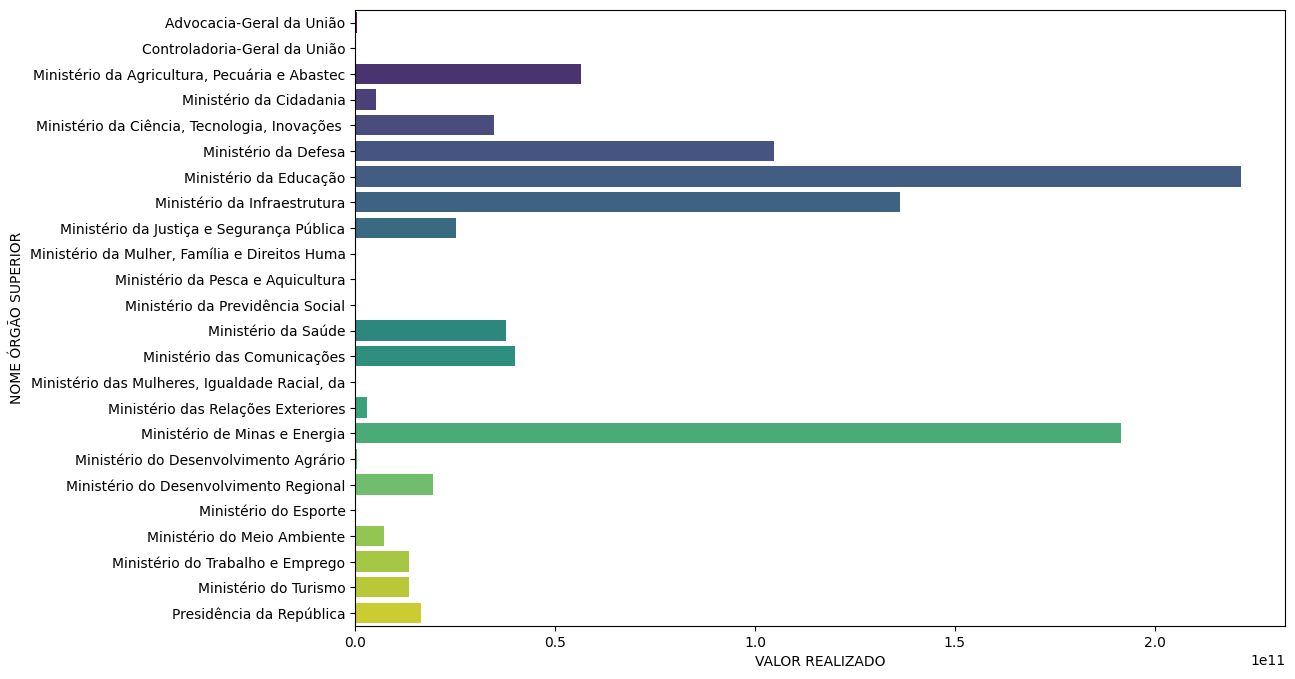

In [24]:
plt.figure(figsize=(12, 8))  # Tamaño del gráfico
sns.barplot(
    x="VALOR REALIZADO",
    y="NOME ÓRGÃO SUPERIOR",
    data=entidad_gub_sin_ec,
    palette="viridis" )

In [25]:
# Ingresos por categoría económica general
info_cat_ec(datos_brasil, ["NOME ÓRGÃO SUPERIOR", "NOME ÓRGÃO"])

VALOR PREVISTO ATUALIZADO  \
NOME ÓRGÃO SUPERIOR                           NOME ÓRGÃO                                                                      
Advocacia-Geral da União                      Advocacia-Geral da União - Unidades com vínculo...           3,726,053,651.00   
Controladoria-Geral da União                  Controladoria-Geral da União                                    19,176,752.00   
                                              Controladoria-Geral da União - Unidades com vín...             721,516,104.00   
Ministério da Agricultura, Pecuária e Abastec Companhia Nacional de Abastecimento                         16,181,320,395.00   
                                              Empresa Brasileira de Pesquisa Agropecuária                  4,543,365,404.00   
...                                                                                                                     ...   
Presidência da República                      Presidência da República                                    62,262,221,500.00   
                                              Secretaria da Micro e Pequena Empresa                          124,701,862.00   
                                              Secretaria de Assuntos Estratégicos                                      0.00   
                                              Secretaria de Direitos Humanos                                           0.00   
                                              Secretaria de Políticas de Promoção da Igualdad...                       0.00   

                                                                                                  VALOR LANÇADO  \
NOME ÓRGÃO SUPERIOR                           NOME ÓRGÃO                                                          
Advocacia-Geral da União                      Advocacia-Geral da União - Unidades com vínculo...           0.00   
Controladoria-Geral da União                  Controladoria-Geral da União                                 0.00   
                                              Controladoria-Geral da União - Unidades com vín...           0.00   
Ministério da Agricultura, Pecuária e Abastec Companhia Nacional de Abastecimento                          0.00   
                                              Empresa Brasileira de Pesquisa Agropecuária                  0.00   
...                                                                                                         ...   
Presidência da República                      Presidência da República                                     0.00   
                                              Secretaria da Micro e Pequena Empresa                        0.00   
                                              Secretaria de Assuntos Estratégicos                          0.00   
                                              Secretaria de Direitos Humanos                               0.00   
                                              Secretaria de Políticas de Promoção da Igualdad...           0.00   

                                                                                                   VALOR REALIZADO  \
NOME ÓRGÃO SUPERIOR                           NOME ÓRGÃO                                                             
Advocacia-Geral da União                      Advocacia-Geral da União - Unidades com vínculo...    334,962,977.49   
Controladoria-Geral da União                  Controladoria-Geral da União                            4,346,194.92   
                                              Controladoria-Geral da União - Unidades com vín...      3,208,842.53   
Ministério da Agricultura, Pecuária e Abastec Companhia Nacional de Abastecimento                 1,157,437,895.80   
                                              Empresa Brasileira de Pesquisa Agropecuária           410,143,266.07   
...                                                                                                            ...   
Presid

In [26]:
organizaciones_superiores = datos_brasil[datos_brasil["NOME ÓRGÃO SUPERIOR"] == "Advocacia-Geral da União"]
info_cat_ec(organizaciones_superiores, "NOME ÓRGÃO")

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO,,,,,
Advocacia-Geral da União - Unidades com vínculo direto,"3,726,053,651.00",0.00,"334,962,977.49",8.99,"334,962,977.49"


In [27]:
organizaciones_superiores = datos_brasil[datos_brasil["NOME ÓRGÃO"] == "Advocacia-Geral da União - Unidades com vínculo direto"]
info_cat_ec(organizaciones_superiores, "NOME UNIDADE GESTORA")

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME UNIDADE GESTORA,,,,,
COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,"3,726,053,651.00",0.00,"334,962,977.49",8.99,"334,962,977.49"
